# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from sklearn import metrics
from scipy.stats import ks_2samp

In [43]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [45]:
def bivariada_cat(df, var_resp, var_expl):

    tab = pd.crosstab(df[var_expl], df[var_resp], margins= True)
    tab['Percentage'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])
    return tab

In [46]:
bivariada_cat(df, "flag_doente", "restecg")

flag_doente,0,1,All,Percentage,Odds,Odds ratio,Logito,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [47]:
bivariada_cat(df, "flag_doente", "thal")

flag_doente,0,1,All,Percentage,Odds,Odds ratio,Logito,WOE
thal,,,,,,,,
3.0,129,37,166,0.222892,0.286822,0.338408,-1.248894,-1.083502
6.0,6,12,18,0.666667,2.000000,2.359712,0.693147,0.858540
7.0,28,89,117,0.760684,3.178571,3.750257,1.156432,1.321824
?,1,1,2,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [48]:
bivariada_cat(df, "flag_doente", "cp")

flag_doente,0,1,All,Percentage,Odds,Odds ratio,Logito,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


A variável 'cp' discrimina mais o risco, com a categoria '4-assintomático' apresentando 72% dos seus indivíduos com doença cardíaca, indicando que a presença de dor, ao contrário do que possa parecer, não é um fator principal de risco. 
Em segundo lugar a variável 'restecg' discrimina pela categoria '1-tendo anormalidade da onda ST-T', apresentando 76% dos indivíduos com doença cardíaca. 

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [49]:
def bivariada_cont(df, var_resp, var_expl, cut=5):

    df['cut'] = pd.qcut(df[var_expl], cut)
    tab = pd.crosstab(df['cut'], df[var_resp], margins= True)
    tab['Percentage'] = tab[1]/tab['All']
    tab['Odds'] = tab[1]/tab[0]
    tab['Odds ratio'] = tab['Odds']/tab.loc['All','Odds']
    tab['Logito'] = np.log(tab['Odds'])
    tab['WOE'] = np.log(tab['Odds ratio'])
    tab['Média'] = df.groupby('cut')[var_expl].mean().round()
    
    return tab

In [50]:
bivariada_cont(df, "flag_doente", "chol", 4) #testando um exemplo 

C:\Users\lucia\AppData\Local\Temp\ipykernel_17684\1336401744.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab['Média'] = df.groupby('cut')[var_expl].mean().round()


flag_doente,0,1,All,Percentage,Odds,Odds ratio,Logito,WOE,Média
cut,,,,,,,,,
"(125.999, 211.0]",48,29,77,0.376623,0.604167,0.712830,-0.503905,-0.338513,189.0
"(211.0, 241.0]",44,31,75,0.413333,0.704545,0.831262,-0.350202,-0.184810,227.0
"(241.0, 275.0]",40,36,76,0.473684,0.900000,1.061871,-0.105361,0.060032,258.0
"(275.0, 564.0]",32,43,75,0.573333,1.343750,1.585432,0.295464,0.460857,314.0
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [51]:
reglog = smf.logit(" flag_doente ~ sex + cp + trestbps + age"
                   , data=df).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.2605
Time:                        11:23:47   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

Com base na avaliação do P-value, as variáveis se mostram significantes para determinação da resposta. A variável 'sex' parece ter uma contribuição maior devido ao seu coeficiente beta ser maior, seguida de 'cp'. 'age' e 'trestbps' têm pouca contribuição no modelo, porém não é nula. 

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [52]:
#Calcule a probabilidade de evento predita segundo o seu modelo

df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,cut,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(211.0, 241.0]",0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(275.0, 564.0]",0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(211.0, 241.0]",0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(241.0, 275.0]",0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(125.999, 211.0]",0.024768


In [53]:
#Categorize essa probabilidade em G=5 grupos

cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.0119, 0.146]    61
(0.146, 0.349]     60
(0.349, 0.575]     61
(0.575, 0.772]     60
(0.772, 0.928]     61
Name: count, dtype: int64

In [55]:
#Calcule a probabilidade de evento predita média por grupo

group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid['media_predito'] = group_reg['predito'].mean()
qualid

C:\Users\lucia\AppData\Local\Temp\ipykernel_17684\2793857124.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_reg = df.groupby(cat_pred)


,contagem,media_predito
predito,,
"(0.0119, 0.146]",61,0.076255
"(0.146, 0.349]",60,0.249060
"(0.349, 0.575]",61,0.457982
"(0.575, 0.772]",60,0.673059
"(0.772, 0.928]",61,0.837449


In [56]:
#Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo

qualid['taxa_eventos'] = group_reg['flag_doente'].mean()
qualid

,contagem,media_predito,taxa_eventos
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


A taxa de eventos corresponde ao percentual de doentes. 

Text(0.5, 0, 'Grupo')

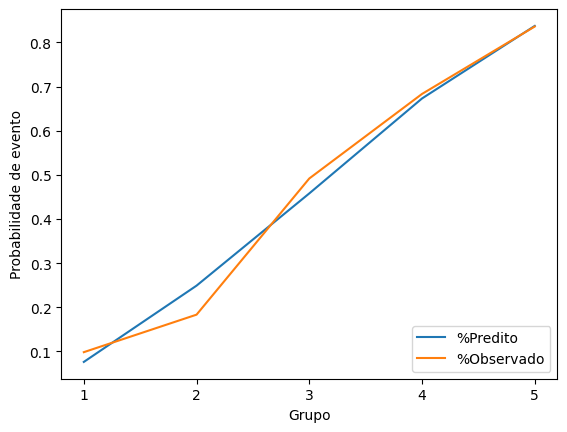

In [57]:
#Compare graficamente o valor esperado versus observado para a taxa de maus por grupo

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['media_predito'].plot(label='%Predito')
ax = qualid['taxa_eventos'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [76]:
#Calculando acurácia:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Calculando Gini
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1

#Calculando KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {1:.2f}%'
      .format(ks*100, gini*100))

Acurácia: 77.89%
KS: 58.40% 
GINI: 66.22%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [69]:
#Checando o P-value para todas variáveis, removemos as que possuem P-value maior que 5%:

reglog2 = smf.logit(" flag_doente ~ sex + cp + trestbps + thalach + exang"
                   , data=df).fit()
reglog2.summary()


Optimization terminated successfully.
         Current function value: 0.460311
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Mar 2024   Pseudo R-squ.:                  0.3326
Time:                        12:30:40   Log-Likelihood:                -139.47
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.871e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8402      1.751     -1.622      0.105      -6.272       0.592
sex            1.6813      0.347      4.842      0.000       1.001       2.362
cp             0.8106      0.175      4.633      0.000       0.468       1.154
trestbps       0.0282      0.009      3.204      0.001       0.011       0.045
thalach       -0.0343      0.008     -4.427      0.000      -0.050      -0.019
exang          1.0723      0.346      3.100      0.002       0.394       1.750
==============================================================================
"""

In [73]:
df2 = df.copy()

In [74]:
df2['predito'] = reglog2.predict(df2)

In [77]:
#Calculando acurácia:
acc = metrics.accuracy_score(df2['flag_doente'], df2['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Calculando Gini (através de AUC)
fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1

#Calculando KS
ks = ks_2samp(df2.loc[df['flag_doente'] == 1, 'predito'], df2.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {1:.2f}%'
      .format(ks*100, gini*100))

Acurácia: 79.21%
KS: 60.67% 
GINI: 72.53%


Acrescentando as variáveis 'thalach + exang' e removendo a variável 'age', foi possível melhorar os indicadores da qualidade do modelo. 